B006QB1RPY
ASUS RT-N66U Dual-Band Wireless-N900 Gigabit Router


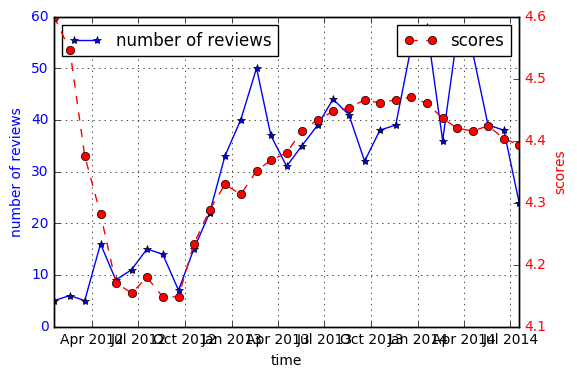

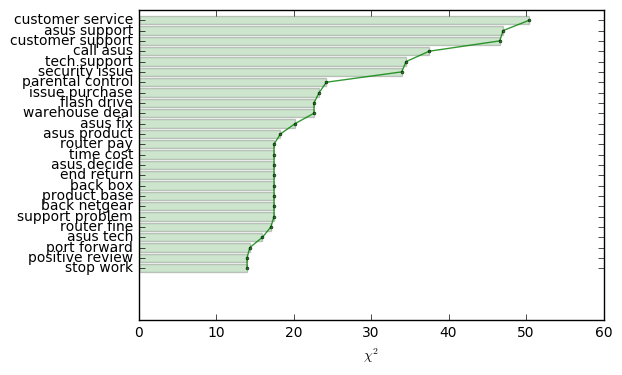

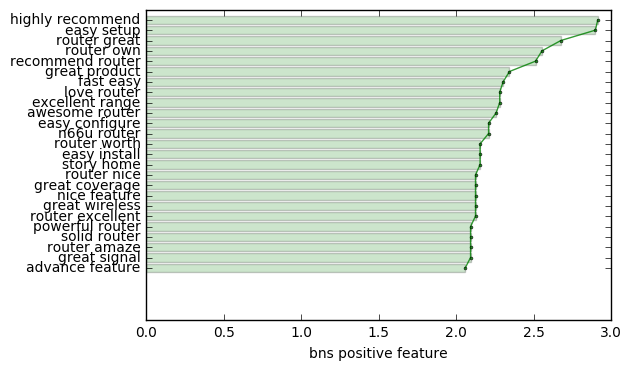

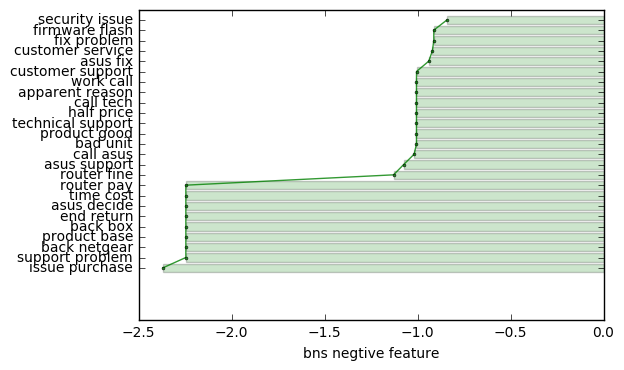

Topic from postive review
Topic 0 : replacement routers band asus computer good weeks wireless
Topic 1 : house set asus signal unit connect coverage network
Topic 2 : firmware tomato asus run n66u 192 wrt wifi
Topic 3 : network ghz speed work channel connect access link
Topic 4 : link range product speed asus firmware work signal
Topic 5 : 802 66u 11n band great wont firmware n66u
Topic 6 : great product computer range time signal asus home
Topic 7 : update firmware amped internet wifi wireless network load
Topic from negtive review
Topic 0: channel speed network devices wireless firmware wifi great
Topic 1: issue 802 devices wireless flaky 11g house signal
Topic 2: upright signal wireless quality sit good strong great
Topic 3: great reset interface excellent floor feature house devices
Topic 4: 100 xbox loss ping work set lose time
Topic 5: antenna firmware support wifi update send tech issue
Topic 6: supply mount wireless great wall buy firmware set
Topic 7: firmware network asus wif

In [7]:
from IPython.display import display
from IPython.html import widgets
from urllib2 import Request, urlopen
from bs4 import BeautifulSoup
%run plot.py
#B007WTAJTO
#%run productfeature.py
text = widgets.Text(description="ProductID", width=200)
display(text)
button = widgets.Button(description="Search")
display(button)
def on_button_clicked(b):
    for i in range(10):
        clear_output()
    print(text.value)
    try:
        print(productname[productname['asin']==text.value]['title'][0])
    except:
        try:
            url="https://www.amazon.com/dp/" + text.value
            req = Request(url,headers={'User-Agent' : "Magic Browser"})
            webpage = urlopen(req).read()
            soup=BeautifulSoup(webpage,'html.parser')
            info=soup.findAll("span", { "id" : "productTitle" })
            print(info[0].text)
        except:
            print('Information of product is note avaible on amazon')
    #print(str(productname[productname['asin']==text.value]['title']))
    grade_count_time(text.value,amazon)
    featureselect(text.value,rating_time)
button.on_click(on_button_clicked)

In [4]:
from __future__ import division
from itertools import combinations
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import concat, col, lit
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from IPython.display import clear_output
import numpy as np
from pyspark.ml.linalg import SparseVector
from operator import attrgetter
from scipy.sparse import vstack
from scipy.sparse import csr_matrix

from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import concat, col, lit
import pandas as pd

from sklearn.feature_selection import chi2,SelectKBest
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
import numpy as np
from pyspark.ml.linalg import SparseVector
from operator import attrgetter
from scipy.sparse import vstack
from scipy.sparse import csr_matrix
from pyspark.ml.feature import CountVectorizer
from pylab import barh,plot,yticks,show,grid,xlabel,figure
import nltk

def cleantext( raw_data):
    letters_only = re.sub("[^a-zA-Z0-9]", " ", raw_data) 
    words = word_tokenize(letters_only.lower())                         
    meaningful_words = [ WordNetLemmatizer().lemmatize(w,'v') for w in words if not w in stops]
    meaningful_words = [w for w in meaningful_words if (len(w) >2) and (not w in white) ]
    return (' ').join(meaningful_words)

def feature_select(x):
    if ' 'in x[0]:
        temp=nltk.pos_tag(nltk.word_tokenize(x[0]))
        temp=zip(*temp)
        term=[('JJ','NN'),('NN','JJ'),('RB','VB'),('RB','NN'),('RB','JJ'),('NN','NN'),('RB','RB')]
        return( temp[1] in term)

def as_matrix(vec):
    data, indices = vec.values, vec.indices
    shape = 1, vec.size
    return csr_matrix((data, indices, np.array([0, vec.values.size])), shape)


productlist=pd.read_excel('productinfo.xlsx')
bwlist=pd.read_excel('whitelist.xlsx')
white=set(bwlist['white'].tolist())
black=set(bwlist['black'].tolist())
productname=pd.read_excel('productname.xlsx')
stemmer = PorterStemmer()
stops = set(stopwords.words("english"))
stops=stops|black

amazon = sqlContext.read.json("Electronics_5.json")
amazon1=amazon.withColumn("output",(amazon['overall']>3).cast('int').cast('int'))
amazon1=amazon1.select('*',concat(col("summary"), lit(" "), col("reviewText")).alias("reviewsum"))
#amazon1=amazon1.filter(amazon1.output>-1)
amazon1=amazon1.drop('reviewText')
clean = udf(lambda s: cleantext(s), StringType())
amazon1= amazon1.withColumn('reviewsum', clean(amazon1['reviewsum']))
tokenizer = Tokenizer(inputCol="reviewsum", outputCol="words")
amazon1 = tokenizer.transform(amazon1)
twcom=[]
def twoword(doc):
    term=doc.split()
    temp=[]
    #temp += ["vvv".join(a) for a in combinations(term[0:(0+4)], 2)]
    for i in (range(len(term)-1)):
            temp += [term[i]+'vvv'+term[i+1]]
    return (" ".join(temp))

tw = udf(lambda s: twoword(s), StringType())
amazon1=amazon1.withColumn('reviewsum1', tw(amazon1['reviewsum']))
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
tokenizer = Tokenizer(inputCol="reviewsum1", outputCol="ngrams")
wordsData = tokenizer.transform(amazon1)
rating_time=wordsData

In [5]:
def featureselect(x,rating_time):
    from sklearn.feature_selection import chi2,SelectKBest
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from pyspark.ml.feature import CountVectorizer # Import the stop word list
    #from nltk.stem.porter import *
    from nltk.stem.wordnet import WordNetLemmatizer
    from pyspark.ml.feature import HashingTF, IDF, Tokenizer
    import numpy as np
    from pyspark.ml.linalg import SparseVector
    from operator import attrgetter
    from scipy.sparse import vstack
    from scipy.sparse import csr_matrix

    from pylab import barh,plot,yticks,show,grid,xlabel,figure
    import nltk


    rating_time=rating_time.filter(rating_time.asin==x)
    #form term frequency table
    cv = CountVectorizer(inputCol="ngrams", outputCol="vectors", minDF=3.0)
    model = cv.fit(rating_time)
    result = model.transform(rating_time)
    features = result.rdd.map(attrgetter("vectors"))
    def as_matrix(vec):
        data, indices = vec.values, vec.indices
        shape = 1, vec.size
        from scipy.sparse import csr_matrix
        return csr_matrix((data, indices, np.array([0, vec.values.size])), shape)

    mats = features.map(as_matrix)
    mat = vstack(mats.collect()).toarray()
    output=result.select('output').rdd.flatMap(lambda x: x).collect()
    output=np.array(output)
    vocab_term=model.vocabulary
    vocab_term=[x.replace('vvv',' ') for x in vocab_term]
    ################################CHI FUNC START####################################################
    def feature_select(x):
        from nltk import pos_tag
        temp=pos_tag(nltk.word_tokenize(x[0]))
        temp=zip(*temp)
        term=[('JJ','NN'),('NN','JJ'),('RB','VB'),
        ('RB','NN'),('RB','JJ'),('NN','NN'),('RB','RB')]
        return( temp[1] in term)
    chi2score = chi2(mat,output)
    wscores = zip(vocab_term,chi2score[0],chi2score[1])
    wchi2 = sorted(wscores,key=lambda x:x[1]) 
    chitemp=[x for x in wchi2 if feature_select(x)]
    topchi2 = zip(*chitemp[-25:])
    x = range(len(topchi2[1]))
    chilabels = topchi2[0]
    x = range(len(topchi2[1]))
    labels = topchi2[0]
    barh(x,topchi2[1],align='center',alpha=.2,color='g')
    plot(topchi2[1],x,'-o',markersize=2,alpha=.8,color='g')
    yticks(x,labels)
    xlabel('$\chi^2$')
    show()
    #################################CHI FUNC END######################################################
    #############################BNS FUNC START####################################################
    #bi-normal separation feature selection
    #vocab_term=[x.replace('vvv',' ') for x in vocab_term]
    def bns_select(x,y):
        import numpy as np
        np.seterr(divide='ignore', invalid='ignore')
        from scipy.stats import norm
        z=(x>0)*1
        tpr=np.dot(y,z) / y.sum()
        fpr=np.dot(1-y,z) / (1-y).sum()
        tpr[tpr==0]=0.00001
        fpr[fpr==0]=0.00001
        score=norm.ppf(tpr)-norm.ppf(fpr)
        return score
    
    bnsscore = zip(vocab_term,bns_select(mat,output))
    wbns = sorted(bnsscore,key=lambda x:float(x[1])) 
    wbnstemp=[x for x in wbns if feature_select(x)]
    toppos = zip(*wbnstemp[-25:])
    topneg = zip(*wbnstemp[:25])
    x = range(len(toppos[1]))
    labels = toppos[0]
    barh(x,toppos[1],align='center',alpha=.2,color='g')
    plot(toppos[1],x,'-o',markersize=2,alpha=.8,color='g')
    yticks(x,labels)
    xlabel('bns positive feature')
    show()
    toppos=topneg
    x = range(len(toppos[1]))
    labels = toppos[0]
    barh(x,toppos[1],align='center',alpha=.2,color='g')
    plot(toppos[1],x,'-o',markersize=2,alpha=.8,color='g')
    yticks(x,labels)
    xlabel('bns negtive feature')
    show()
    
    from pyspark.mllib.clustering import LDA, LDAModel
    from pyspark.mllib.linalg import Vectors,SparseVector,DenseVector
    from pyspark.mllib.feature import IDF
    from pyspark.ml.feature import CountVectorizer
    from pyspark.ml.clustering import DistributedLDAModel
    numclu=8
    ratingtemp=rating_time
    rating_time=ratingtemp.filter(ratingtemp.output==1)
    cv = CountVectorizer(inputCol="words", outputCol="vectors", minDF=3.0)
    model = cv.fit(rating_time)
    result = model.transform(rating_time)
    vocablist = model.vocabulary
    countVectors = result.select( "vectors")
    frequencyVectors = countVectors.rdd.map(lambda x:DenseVector(x[0].toArray()))
    frequencyVectors.cache()
    idf = IDF().fit(frequencyVectors)
    tfidf = idf.transform(frequencyVectors)


    corpus = tfidf.zipWithIndex().map(lambda x: [x[1], x[0]]).cache()
    ldaModel = LDA.train(corpus, k = numclu, maxIterations=10, optimizer="online", docConcentration=2.0, topicConcentration=3.0)
    topicIndices = ldaModel.describeTopics(maxTermsPerTopic=8)
    #ldaresult=ldaModel.transform(corpus)
    from operator import itemgetter
    topicsRDD = sc.parallelize(topicIndices)
    termsRDD = topicsRDD.map(lambda topic: (zip(itemgetter(*topic[0])(vocablist), topic[1])))
    indexedTermsRDD = termsRDD.zipWithIndex()
    termsRDD = indexedTermsRDD.flatMap(lambda term: [(t[0], t[1], term[1]) for t in term[0]])
    termDF = termsRDD.toDF(['term', 'probability', 'topicId']).toPandas()
    print('Topic from postive review')
    for x in range(numclu):
        topic_words=termDF[termDF['topicId']==x]['term'].tolist()
        print('Topic {} : {}'.format(x, ' '.join(topic_words)))
    
    rating_time=ratingtemp.filter(ratingtemp.output==1)
    cv = CountVectorizer(inputCol="words", outputCol="vectors", minDF=3.0)
    model = cv.fit(rating_time)
    result = model.transform(rating_time)
    vocablist = model.vocabulary
    countVectors = result.select( "vectors")
    frequencyVectors = countVectors.rdd.map(lambda x:DenseVector(x[0].toArray()))
    frequencyVectors.cache()
    idf = IDF().fit(frequencyVectors)
    tfidf = idf.transform(frequencyVectors)


    corpus = tfidf.zipWithIndex().map(lambda x: [x[1], x[0]]).cache()
    ldaModel = LDA.train(corpus, k = numclu, maxIterations=10, optimizer="online", docConcentration=2.0, topicConcentration=3.0)
    topicIndices = ldaModel.describeTopics(maxTermsPerTopic=8)
    #ldaresult=ldaModel.transform(corpus)
    from operator import itemgetter
    topicsRDD = sc.parallelize(topicIndices)
    termsRDD = topicsRDD.map(lambda topic: (zip(itemgetter(*topic[0])(vocablist), topic[1])))
    indexedTermsRDD = termsRDD.zipWithIndex()
    termsRDD = indexedTermsRDD.flatMap(lambda term: [(t[0], t[1], term[1]) for t in term[0]])
    termDF = termsRDD.toDF(['term', 'probability', 'topicId']).toPandas()
    print('Topic from negtive review')
    for x in range(numclu):
        topic_words=termDF[termDF['topicId']==x]['term'].tolist()
        print('Topic {}: {}'.format(x, ' '.join(topic_words)))
    #################################BNS FUNC END##################################################
